# **Drug Classification Prediction**
#### **Name: Aryan Jamwal**
#### **Reg No: RA1811031010019**
#### **CSE-IT**

# Importing Library

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reading Dataset

In [308]:
df_drug = pd.read_csv("/content/drug200.csv")

In [309]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [310]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


From the results above, there are no missing value in this dataset

# Data Exploration

## Categorical columns

In [311]:
df_drug.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [312]:
df_drug.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [313]:
df_drug.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [314]:
df_drug.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

## Numerical columns

In [315]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [316]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [317]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


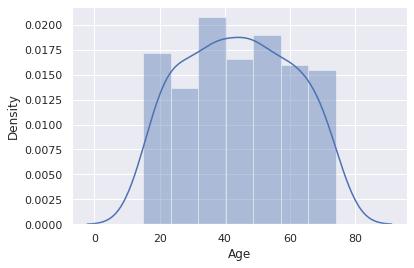

In [318]:
sns.distplot(df_drug['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


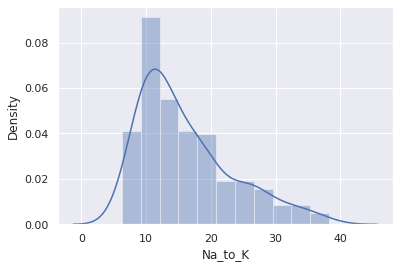

In [319]:
sns.distplot(df_drug['Na_to_K'])

The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5

The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

# Exploratory Data Analysis

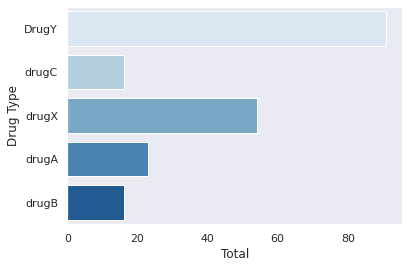

In [320]:
sns.set_theme(style="dark")
sns.countplot(y="Drug", data=df_drug, palette="Blues")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

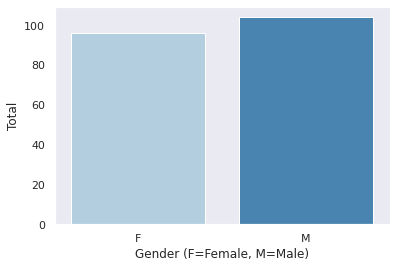

In [321]:
sns.set_theme(style="dark")
sns.countplot(x="Sex", data=df_drug, palette="Blues")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

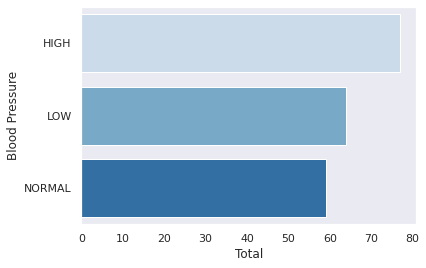

In [322]:
sns.set_theme(style="dark")
sns.countplot(y="BP", data=df_drug, palette="Blues")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

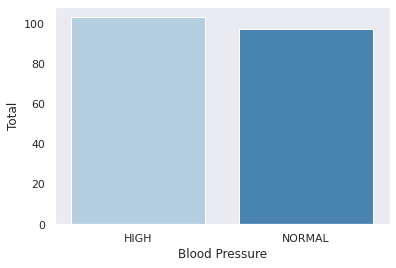

In [323]:
sns.set_theme(style="dark")
sns.countplot(x="Cholesterol", data=df_drug, palette="Blues")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

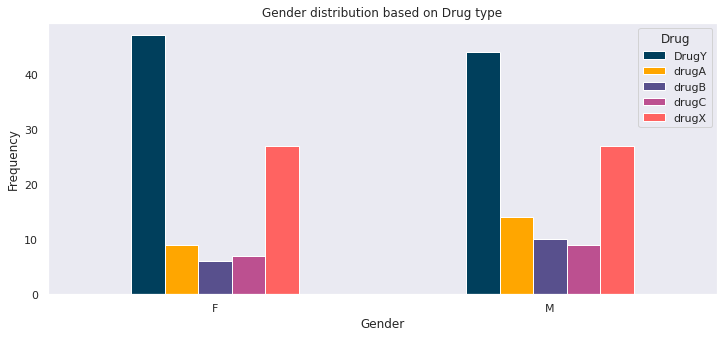

In [324]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

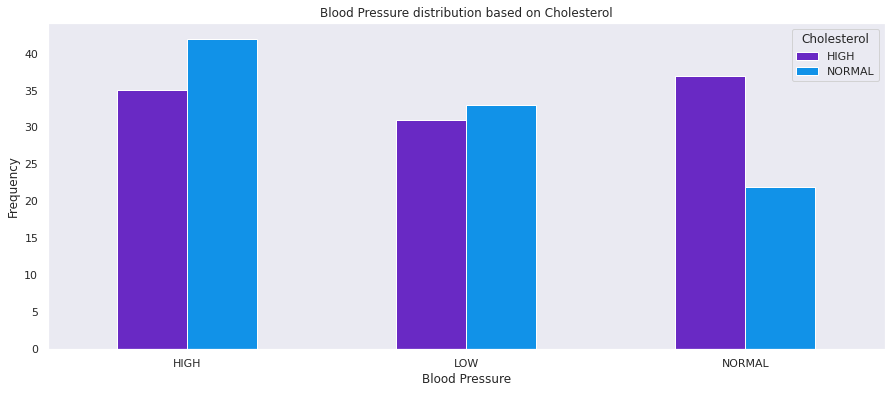

In [325]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

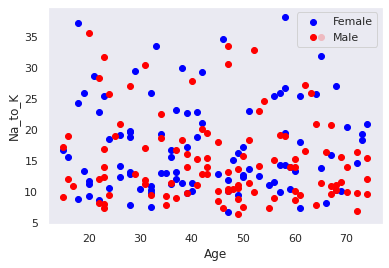

In [326]:
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'], y=df_drug.Na_to_K[(df_drug.Sex=='F')], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'], y=df_drug.Na_to_K[(df_drug.Sex=='M')], c="Red")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

# Data Preprocessing

## Data Binning

### 'Age' Column

In [327]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Age'], axis = 1)

### 'Na_to_K' Column

In [328]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['Na_to_K'], axis = 1)

# Data Preparation

In [329]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [330]:
X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature Engineering

In [331]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

## SMOTE Technique

Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting

In [332]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

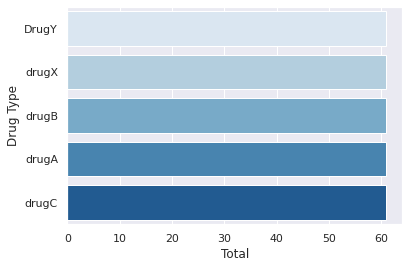

In [333]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="Blues")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

# Model Building

## Decision Tree

In [334]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=21)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       0.91      0.67      0.77        30
       drugA       0.50      0.60      0.55         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.80        60
   macro avg       0.73      0.85      0.77        60
weighted avg       0.82      0.80      0.80        60

[[20  3  1  2  4]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Decision Tree accuracy is: 80.00%


## Random Forest

In [335]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 85.00%


# Model Comparison

In [336]:
compare = pd.DataFrame({'Model': ['Decision Tree','Random Forest'], 
                        'Accuracy': [DTAcc*100,RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Random Forest,85.0
0,Decision Tree,80.0
